<a href="https://colab.research.google.com/github/daegeunbae/daegeunbae/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/02.coding/10.Team_Project/03.laplas/Superstore.csv')
df.info()
#,encoding='utf-8'
#df=pd.read_excel('https://github.com/springcoil/marsmodelling/blob/master/relay-foods.xlsx?raw=true', 
#                 sheet_name='Purchase Data - Full Study')
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.value_counts()

Row ID  Order ID        Order Date  Ship Date   Ship Mode       Customer ID  Customer Name     Segment      Country        City         State          Postal Code  Region   Product ID       Category         Sub-Category  Product Name                                                               Sales    Quantity  Discount  Profit   
1       CA-2016-152156  2016-11-08  2016-11-11  Second Class    CG-12520     Claire Gute       Consumer     United States  Henderson    Kentucky       42420        South    FUR-BO-10001798  Furniture        Bookcases     Bush Somerset Collection Bookcase                                          261.960  2         0.0        41.9136     1
6666    CA-2016-115483  2016-07-14  2016-07-18  Second Class    JS-15880     John Stevenson    Consumer     United States  Irving       Texas          75061        Central  OFF-PA-10001497  Office Supplies  Paper         Xerox 1914                                                                 219.840  5         0.2       

In [ ]:
df.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [ ]:
df.isnull().any().sum()

0

In [ ]:
# RFM 분석 ->고객별 scoring이 나오면 그 조합별로 클러스터링
# Recency : 얼마나 최근에 구매했는가 Frequency : 얼마나 자주 구매했는가 Monetary : 얼마나 많은 금액을 지출했는가
# 사용자 분류하기(segmentation)
# 논문 활용하여 묶

In [ ]:
#지역
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [ ]:
#고객분포
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
#코호트 그룹 분석
#(연령) 코호트
#(지역) 코호트
#(상품별 판매량) 코호트
#(연령별 상품)
#(상품별 마진) 코호트

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


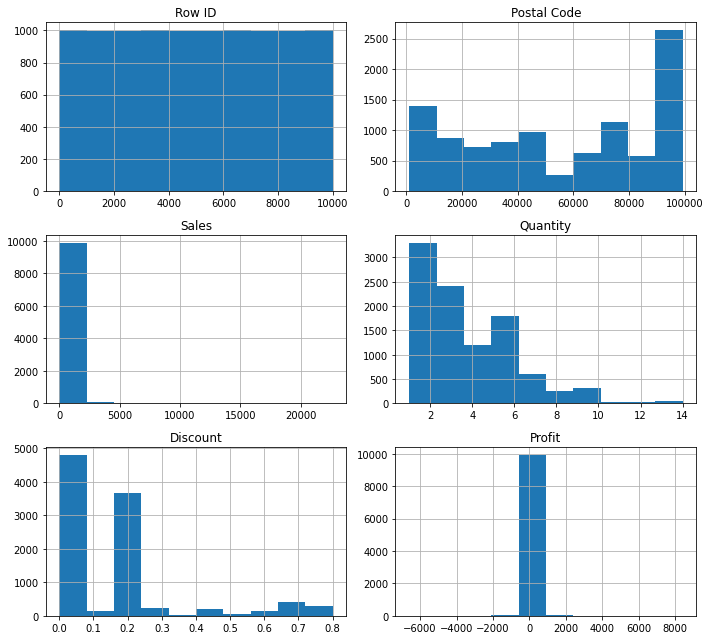

In [ ]:
#행동패턴 분석
import seaborn as sns 
import matplotlib.pyplot as plt
df.hist(figsize=(10, 9))
plt.tight_layout() 
plt.show()

In [ ]:
df['OrderPeriod']=df['Order Date'].dt.strftime('%Y-%m')
df

AttributeError: ignored

In [ ]:
df['Order Date']

0       2016-11-08
1       2016-11-08
2       2016-06-12
3       2015-10-11
4       2015-10-11
           ...    
9989    2014-01-21
9990    2017-02-26
9991    2017-02-26
9992    2017-02-26
9993    2017-05-04
Name: Order Date, Length: 9994, dtype: object

In [ ]:
#드디어 람다 어플라이..
# 날짜별로 그 날짜의 여러 값 중에서 max-min의 차이를 알고자 함!!
df.apply(lambda x : x.max('Order Date') - x.min('Order Date'), axis = 1)